In [8]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt

from SnakeGA import SnakeSettings
from SnakeGA import SnakeGA


In [9]:
settings = SnakeSettings(field_size=10,
                         view_depth=3,
                         steps_without_food=300,
                         hidden_topology=[20, 12],
                         hidden_activations=["relu", "relu"],
                         population_size=100,
                         epochs=10,
                         mutation_rate=0.01,
                         elitism_num=30,
                         auto_save_span=10)


In [10]:
snakes = SnakeGA(settings=settings)


[Taichi] Starting on arch=x64
Input neurons count -  56
NN params count -  3184


In [11]:
ti.profiler.clear_kernel_profiler_info()  # clear all records
snakes.advance()
ti.profiler.print_kernel_profiler_info(mode='count')


Epoch 10/10=========================================================================
Kernel Profiler(count, default) @ X64 
[      %     total   count |      min       avg       max   ] Kernel name
-------------------------------------------------------------------------
[ 88.11%   3.535 s 159073x |    0.013     0.022     3.112 ms] prep_vision_c80_1_kernel_1_range_for
[  8.35%   0.335 s   1001x |    0.260     0.335     1.231 ms] tensor_to_ext_arr_c6_5_kernel_0_range_for
[  0.93%   0.037 s 159073x |    0.000     0.000     0.023 ms] validate_game_c82_1_kernel_0_serial
[  0.76%   0.030 s 158587x |    0.000     0.000     0.027 ms] snode_reader_7_kernel_0_serial
[  0.74%   0.030 s 159073x |    0.000     0.000     0.024 ms] prep_vision_c80_1_kernel_0_serial
[  0.73%   0.029 s 158587x |    0.000     0.000     0.030 ms] snode_reader_2_kernel_0_serial
[  0.12%   0.005 s     10x |    0.405     0.489     0.703 ms] crossover_c86_1_kernel_0_range_for
[  0.08%   0.003 s     10x |    0.259     0.325 

Text(0, 0.5, 'Fitness')

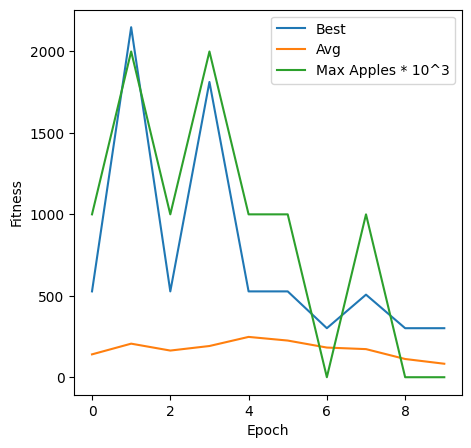

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

plt.plot(snakes.best.to_numpy(), label="Best")
plt.plot(snakes.avg.to_numpy(), label="Avg")
plt.plot(snakes.apples.to_numpy()*1000, label="Max Apples * 10^3")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Fitness")


In [13]:
snakes.fitness.to_numpy()

array([ 10., 301.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10., 301.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10., 301.,
        10.,  10.,  10., 301.,  10.,  10.,  10.,  10.,  10.,  10., 301.,
       301., 301., 301.,  10.,  10.,  10.,  11.,  10., 301., 301., 301.,
        10.,  10.,  10.,  10., 301., 301., 301.,  10.,  10.,  10.,  10.,
        10.,  10.,  10.,  10.,  10., 301., 301.,  10.,  10.,  10.,  10.,
        10.,  10., 301.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,
        10.,  10.,  10., 301., 301.,  10., 301.,  10.,  10., 301., 301.,
        10.,  10.,  10.,  10., 301., 301.,  10.,  10.,  10.,  10.,  10.,
       301.], dtype=float32)